In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#download csv file from https://data.ca.gov/dataset/covid-19-hospital-data/resource/42d33765-20fd-44b8-a978-b083b7542225
#url was limited to 100 searches per query, csv was more convenient and identical
hospitals_df = pd.read_csv("Resources/hospitals_by_county.csv")

In [3]:
#put los angeles and san francisco counties into their own respective dataframes
LA_hosp = hospitals_df.loc[(hospitals_df["county"] == "Los Angeles")]
SF_hosp = hospitals_df.loc[(hospitals_df["county"] == "San Francisco")]

#replace nan values in both county dataframes with zeros, for the whole dataframe
LA_hosp = LA_hosp.fillna(0)
SF_hosp = SF_hosp.fillna(0)

#drop the column we won't be using: hospitalized_covid_patients
LA_hosp = LA_hosp.drop(columns=["hospitalized_covid_patients"])
SF_hosp = SF_hosp.drop(columns=["hospitalized_covid_patients"])

In [4]:
#make new columns to hold total positive patients, total suspected patients, total beds
LA_hosp["Total Positive Patients"] = LA_hosp["hospitalized_covid_confirmed_patients"] + LA_hosp["icu_covid_confirmed_patients"]
LA_hosp["Total Suspected Patients"] = LA_hosp["hospitalized_suspected_covid_patients"] + LA_hosp["icu_suspected_covid_patients"]
LA_hosp["Total Available Beds"] = LA_hosp["all_hospital_beds"] + LA_hosp["icu_available_beds"]

SF_hosp["Total Positive Patients"] = SF_hosp["hospitalized_covid_confirmed_patients"] + SF_hosp["icu_covid_confirmed_patients"]
SF_hosp["Total Suspected Patients"] = SF_hosp["hospitalized_suspected_covid_patients"] + SF_hosp["icu_suspected_covid_patients"]
SF_hosp["Total Available Beds"] = SF_hosp["all_hospital_beds"] + SF_hosp["icu_available_beds"]

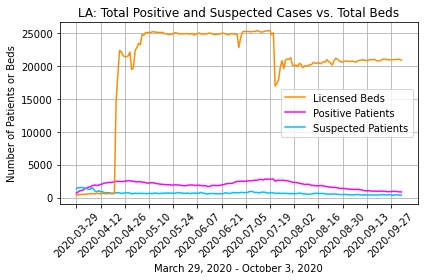

In [5]:
#make lists to hold column data to chart over time
date_axis = LA_hosp["todays_date"]

patients = LA_hosp["hospitalized_covid_confirmed_patients"].tolist()
sus_patients = LA_hosp["hospitalized_suspected_covid_patients"].tolist()
beds = LA_hosp["all_hospital_beds"].tolist()

icu_patients = LA_hosp["icu_covid_confirmed_patients"].tolist()
icu_sus_patients = LA_hosp["icu_suspected_covid_patients"].tolist()
icu_beds = LA_hosp["icu_available_beds"].tolist()

total_patients = LA_hosp["Total Positive Patients"].tolist()
total_suspect = LA_hosp["Total Suspected Patients"].tolist()
total_beds = LA_hosp["Total Available Beds"].tolist()

#chart total positive and suspected patients against total available beds
patients_line, = plt.plot(date_axis, total_patients, color="fuchsia", label="Positive Patients")
suspect_line, = plt.plot(date_axis, total_suspect, color="deepskyblue", label="Suspected Patients")
beds_line, = plt.plot(date_axis, total_beds, color="darkorange", label="Licensed Beds")
plt.title("LA: Total Positive and Suspected Cases vs. Total Beds")
plt.xlabel("March 29, 2020 - October 3, 2020")
plt.ylabel("Number of Patients or Beds")
plt.legend(handles=[beds_line, patients_line, suspect_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/Hosp_LA_total.png", transparent=True, dpi=300)
plt.show()

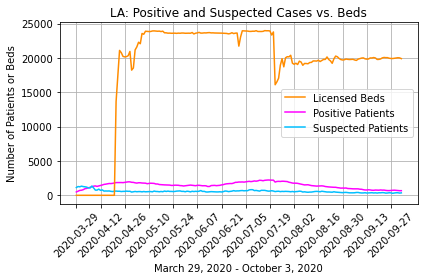

In [6]:
#chart positive and suspected patients against available beds
patients_line, = plt.plot(date_axis, patients, color="fuchsia", label="Positive Patients")
suspect_line, = plt.plot(date_axis, sus_patients, color="deepskyblue", label="Suspected Patients")
beds_line, = plt.plot(date_axis, beds, color="darkorange", label="Licensed Beds")
plt.title("LA: Positive and Suspected Cases vs. Beds")
plt.xlabel("March 29, 2020 - October 3, 2020")
plt.ylabel("Number of Patients or Beds")
plt.legend(handles=[beds_line, patients_line, suspect_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/Hosp_LA_data.png", transparent=True, dpi=300)
plt.show()

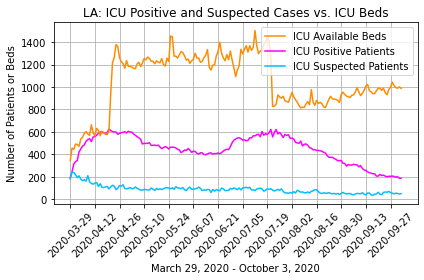

In [7]:
#chart ICU positive and suspected patients against ICU available beds
patients_line, = plt.plot(date_axis, icu_patients, color="fuchsia", label="ICU Positive Patients")
suspect_line, = plt.plot(date_axis, icu_sus_patients, color="deepskyblue", label="ICU Suspected Patients")
beds_line, = plt.plot(date_axis, icu_beds, color="darkorange", label="ICU Available Beds")
plt.title("LA: ICU Positive and Suspected Cases vs. ICU Beds")
plt.xlabel("March 29, 2020 - October 3, 2020")
plt.ylabel("Number of Patients or Beds")
plt.legend(handles=[beds_line, patients_line, suspect_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/Hosp_LA_ICU.png", transparent=True, dpi=300)
plt.show()

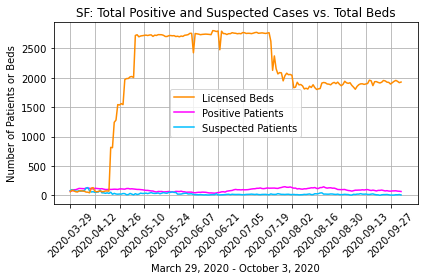

In [8]:
#repeat the same operations for SF data
patients = SF_hosp["hospitalized_covid_confirmed_patients"].tolist()
sus_patients = SF_hosp["hospitalized_suspected_covid_patients"].tolist()
beds = SF_hosp["all_hospital_beds"].tolist()

icu_patients = SF_hosp["icu_covid_confirmed_patients"].tolist()
icu_sus_patients = SF_hosp["icu_suspected_covid_patients"].tolist()
icu_beds = SF_hosp["icu_available_beds"].tolist()

total_patients = SF_hosp["Total Positive Patients"].tolist()
total_suspect = SF_hosp["Total Suspected Patients"].tolist()
total_beds = SF_hosp["Total Available Beds"].tolist()

#chart total positive and suspected patients against total available beds
patients_line, = plt.plot(date_axis, total_patients, color="fuchsia", label="Positive Patients")
suspect_line, = plt.plot(date_axis, total_suspect, color="deepskyblue", label="Suspected Patients")
beds_line, = plt.plot(date_axis, total_beds, color="darkorange", label="Licensed Beds")
plt.title("SF: Total Positive and Suspected Cases vs. Total Beds")
plt.xlabel("March 29, 2020 - October 3, 2020")
plt.ylabel("Number of Patients or Beds")
plt.legend(handles=[beds_line, patients_line, suspect_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/Hosp_SF_total.png", transparent=True, dpi=300)
plt.show()

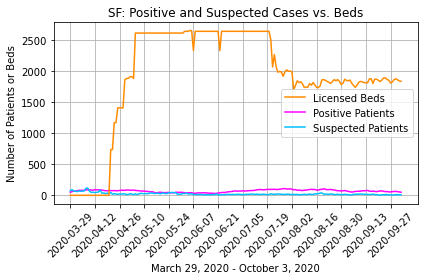

In [9]:
patients_line, = plt.plot(date_axis, patients, color="fuchsia", label="Positive Patients")
suspect_line, = plt.plot(date_axis, sus_patients, color="deepskyblue", label="Suspected Patients")
beds_line, = plt.plot(date_axis, beds, color="darkorange", label="Licensed Beds")
plt.title("SF: Positive and Suspected Cases vs. Beds")
plt.xlabel("March 29, 2020 - October 3, 2020")
plt.ylabel("Number of Patients or Beds")
plt.legend(handles=[beds_line, patients_line, suspect_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/Hosp_SF_data.png", transparent=True, dpi=300)
plt.show()

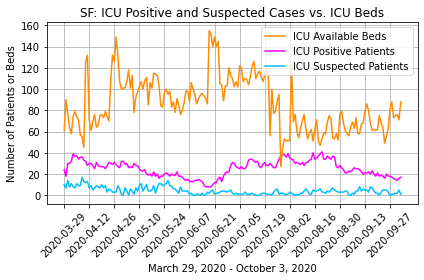

In [10]:
patients_line, = plt.plot(date_axis, icu_patients, color="fuchsia", label="ICU Positive Patients")
suspect_line, = plt.plot(date_axis, icu_sus_patients, color="deepskyblue", label="ICU Suspected Patients")
beds_line, = plt.plot(date_axis, icu_beds, color="darkorange", label="ICU Available Beds")
plt.title("SF: ICU Positive and Suspected Cases vs. ICU Beds")
plt.xlabel("March 29, 2020 - October 3, 2020")
plt.ylabel("Number of Patients or Beds")
plt.legend(handles=[beds_line, patients_line, suspect_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/Hosp_SF_ICU.png", transparent=True, dpi=300)
plt.show()